In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot

import os
import sys
os.chdir('/home/mk7976/git/gaiablip') # Go to the parents directory
cwd = os.getcwd() # Retrieve directory of current running processes
sys.path.insert(0, cwd) # Change the system path to the current running directory

import dynamics_fcns as df
import bh_prior_fcns

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

# Change system path 
os.chdir('/home/mk7976/git/gaiablip/analysis/') # Go to the parents directory
cwd = os.getcwd() # Retrieve directory of current running processes
sys.path.insert(0, cwd) # Change the system path to the current running directory

import analysis_fcns as af 
import dynamics_fcns as df
import dynamics_fcns_for_plot as dffp


priors = bh_prior_fcns.BH_priors() # Iniialize prior and dynamics functions
dynamics = df.Dynamics()
dynamics_for_plot = dffp.Dynamics()


In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)


In [3]:
results_path = '/scratch/mk7976/blip_fit_results/unlens_fit_results' # Specify the directory where results are to be saved
catalog_path = '/scratch/mk7976/epoch_astrometry/lens/x1' # Specify the folder to load the catalog from
analysis_path = '/home/mk7976/git/gaiablip/analysis' # Specify the folder in which the analysis is run


# Import public packages
import pandas as pd
import numpy as np
import pygaia.errors.astrometric as pge
import pygaia.astrometry.coordinates as coord
from matplotlib import pyplot as plt

import timeit
time_list = [] # Create an empty list to save fit runtime values to

# Change system p
# Change system path
os.chdir(analysis_path) # Go to the analysis directory
cwd = os.getcwd() # Retrieve directory of  current running processes
sys.path.insert(0, cwd) # Change the system path to the current running directory

# Retrieve an integer between 0 and the number of GAIA files as specified by the batch script
job_idx = 0

# Load file containing time and scan angle information for all observations
obs_info = pd.read_csv('./obs_info.csv', sep=",", header=None, skiprows = [0]) # Read observation info csv
obs_info.columns = ['t_obs','scan_angles'] # Specify what each column in obs_info file are

# Extrapolate info from obs_info file
t_obs = obs_info['t_obs'].to_numpy() # Observation times [Julian years]
t_plot = np.linspace(t_obs[0],t_obs[-1],100000) # [Julian years]
scan_angles = obs_info['scan_angles'].to_numpy() #  Scan angles [rad]
t_ref = 2017.5 # Reference time for calculating displacement [Julian years]
n_obs = len(t_obs) # Number of observations

In [4]:
ra_1 = 62.35
dec_1 = 34.5
pmra_1 = 2.3
pmdec_1 = 1.2
dist_1 = 800.

traj = dynamics.unlens_2d(ra_1,dec_1,pmra_1,pmdec_1,dist_1)
traj_smooth = dynamics_for_plot.unlens_2d(ra_1,dec_1,pmra_1,pmdec_1,dist_1)


lens_smooth = dynamics_for_plot.unlens_2d(62.35,34.499998,-20,-26,700)
lens = dynamics.unlens_2d(62.35,34.499998,-20,-26,700)


lensed = dynamics.lensed_2d(ra_1,dec_1,pmra_1,pmdec_1,dist_1,62.35,34.499998,-20,-26,700,8)
lensed_smooth = dynamics_for_plot.lensed_2d(ra_1,dec_1,pmra_1,pmdec_1,dist_1,62.35,34.499998,-20,-26,700,8)

al_traj = dynamics.unlens_AL(62.35,34.5,2.3,1.2,800)
al_lens = dynamics.unlens_AL(62.35,34.499998,-20,-26,700)
al_lensed =dynamics.lensed_AL(62.35,34.5,2.3,1.2,800,62.35,34.499998,-20,-26,700,8)

x_shuffled = np.random.normal(loc=lensed[0],scale=0.1)
y_shuffled = np.random.normal(loc=lensed[1],scale=0.1)

<ipython-input-5-d9137891be3d>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()



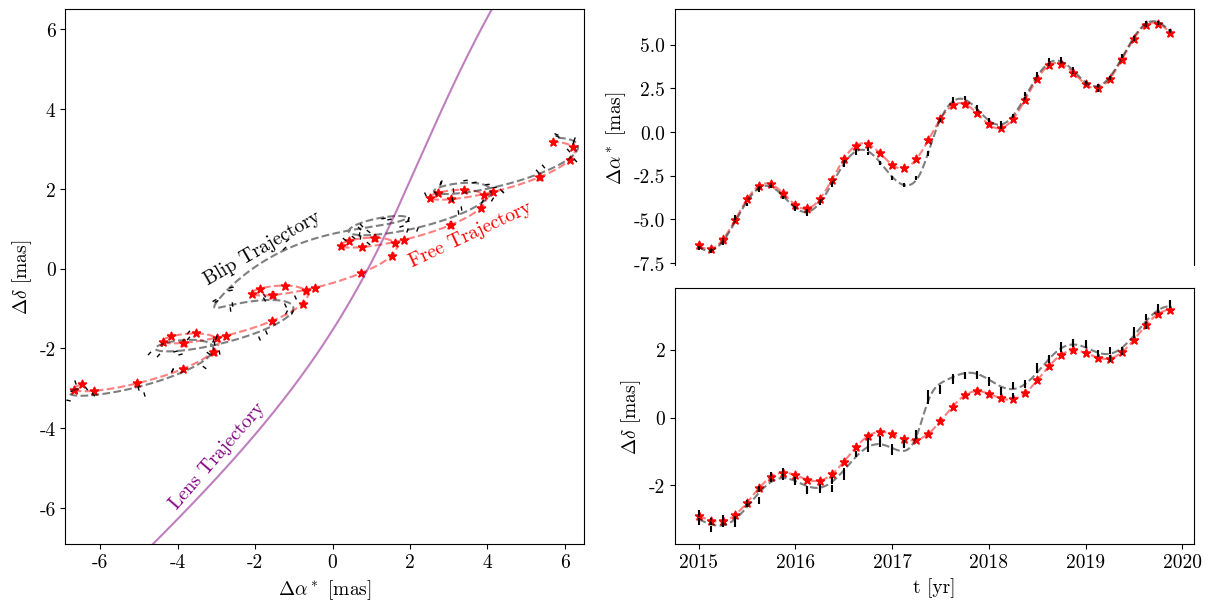

In [5]:
fig, axd = plt.subplot_mosaic([['left', 'upper right'],
                               ['left', 'lower right']],
                              figsize=(12, 6), constrained_layout=True)

axd['left'].plot(traj_smooth[0],traj_smooth[1],linestyle = '--',color='red',alpha=0.5)
axd['left'].plot(lensed_smooth[0],lensed_smooth[1],linestyle = '--',color='black',alpha=0.5)
axd['left'].plot(lens_smooth[0],lens_smooth[1],color='purple',alpha=0.5)
axd['left'].set_ylabel('$\Delta\\delta$ [mas]')
axd['left'].set_xlabel('$\Delta\\alpha^*$ [mas]')
axd['left'].set_xlim(-6.9,6.5)
axd['left'].set_ylim(-6.9,6.5)

axd['left'].text(-4.3, -6, 'Lens Trajectory',rotation=49,color='purple',fontweight='bold')
axd['left'].text(-3.4,-0.4, 'Blip Trajectory',rotation=30,color='black',fontweight='bold')
axd['left'].text(1.9,0.05, 'Free Trajectory',rotation=25,color='red',fontweight='bold')


for n,scan_angle in enumerate(scan_angles):
    axd['left'].scatter(traj[0][n],traj[1][n], marker='*',color='red')
    axd['left'].scatter(x_shuffled[n],y_shuffled[n],marker=(2, 0, scan_angle/(2*np.pi)*360),color='black',s=10)
        
axd['upper right'].plot(t_plot,traj_smooth[0],linestyle = '--',color='red',alpha=0.5)
axd['upper right'].plot(t_plot,lensed_smooth[0],linestyle = '--',color='black',alpha=0.5)

axd['lower right'].plot(t_plot,traj_smooth[1],linestyle = '--',color='red',alpha=0.5)
axd['lower right'].plot(t_plot,lensed_smooth[1],linestyle = '--',color='black',alpha=0.5)         
                       
axd['upper right'].scatter(t_obs,traj[0], marker='*',color='red')
axd['upper right'].errorbar(t_obs,x_shuffled,yerr =0.1,color='black',linestyle='')
axd['upper right'].set_ylabel('$\Delta\\alpha^*$ [mas]')


axd['upper right'].spines['bottom'].set_visible(False)
axd['upper right'].xaxis.set_ticks([])
axd['lower right'].scatter(t_obs,traj[1], marker='*',color='red')
axd['lower right'].errorbar(t_obs,y_shuffled, yerr=0.1,color='black',linestyle='')
axd['lower right'].set_xlabel('t [yr]')
axd['lower right'].set_ylabel('$\Delta\\delta$ [mas]')


axd['left'].set_ylabel('$\Delta\\delta$ [mas]')
axd['left'].set_xlabel('$\Delta\\alpha^*$ [mas]')

fig.show()